In [22]:
pip install wordcloud

In [29]:
import pandas as pd
import sklearn
from wordcloud import WordCloud
import matplotlib.pyplot as plt




In [10]:
df = pd.read_csv('/content/spam.csv',  encoding='ISO-8859-1')

In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df[['v1','v2']]

In [13]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Preprocessing and splitting

In [14]:
df['v1'] = df.v1.map({'ham':0,'spam':1})

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], random_state=42,test_size=0.2)


In [16]:
X_train


1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 4457, dtype: object

## Using count vectorizer to create a frequency of word occurance object

In [17]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


x = cv.fit_transform(X_train)
test = cv.transform(X_test)

## Create and train the model

In [18]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()


In [19]:
naive_bayes.fit(x,y_train)

MultinomialNB()

In [20]:
naive_bayes.score(test,y_test)

0.9838565022421525

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X_train))

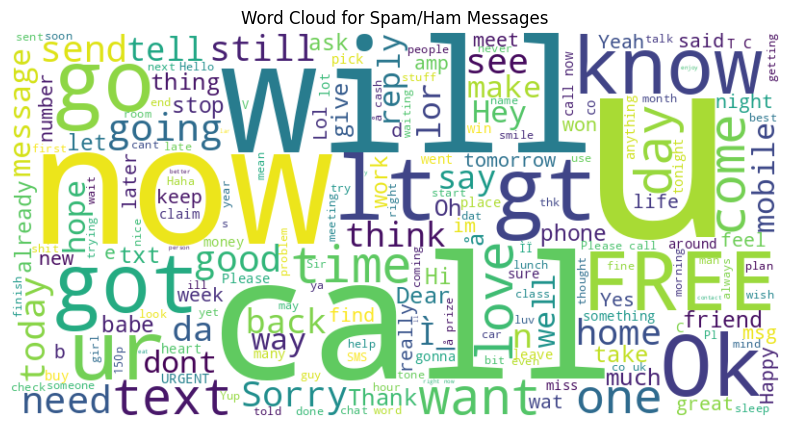

In [27]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Spam/Ham Messages")
plt.show()

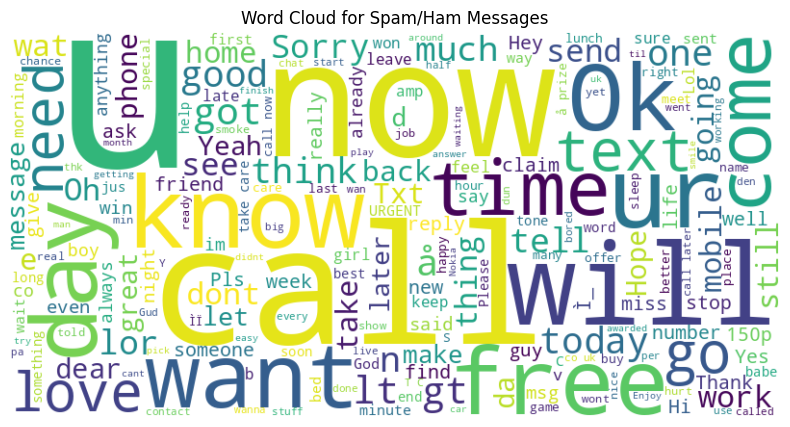

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X_test))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Spam/Ham Messages")
plt.show()

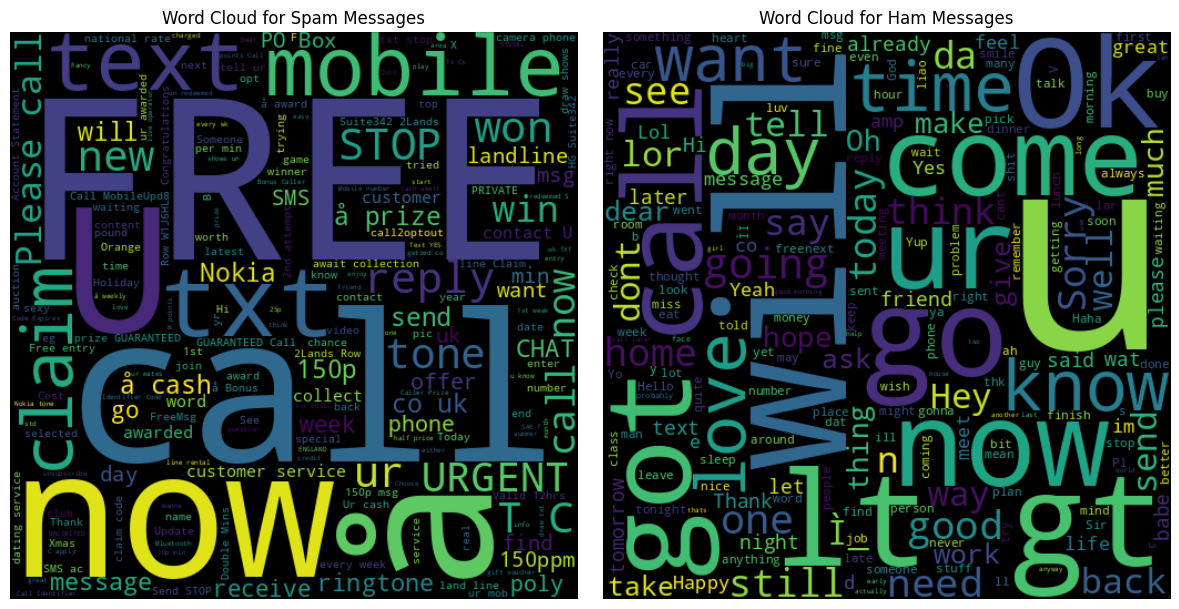

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = ' '.join(list(X_train[y_train == 1]))
ham_messages = ' '.join(list(X_train[y_train == 0]))

# Create word clouds for spam and ham messages
spam_wc = WordCloud(width=512, height=512).generate(spam_messages)
ham_wc = WordCloud(width=512, height=512).generate(ham_messages)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Subplot for spam messages
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

# Subplot for ham messages
plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()
